In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from cifar_helper import reformat_images,generate_figures,show_images
%matplotlib inline


In [19]:
import csv as csv
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn import svm, datasets
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


from sklearn.svm import SVC

In [3]:
def unpickle(file):
    import _pickle as cPickle
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo,encoding='latin1')
    return dict


In [4]:
batch_1 = unpickle('cifar-10-batches-py/data_batch_1')
batch_2 = unpickle('cifar-10-batches-py/data_batch_2')
batch_3 = unpickle('cifar-10-batches-py/data_batch_3')
batch_4 = unpickle('cifar-10-batches-py/data_batch_4')
batch_5 = unpickle('cifar-10-batches-py/data_batch_5')

test = unpickle('cifar-10-batches-py/test_batch')


X_train = np.concatenate((batch_1['data'],
                          batch_2['data'],
                          batch_3['data'],
                          batch_4['data'],
                          batch_5['data']), axis=0)

Y_train = np.concatenate((batch_1['labels'],
                          batch_2['labels'],
                          batch_3['labels'],
                          batch_4['labels'],
                          batch_5['labels']), axis=0)


X_test = test['data']
Y_test = np.asarray(test['labels'])

labels = {0:'airplane',
          1:'automobile',
          2:'bird',
          3:'cat',
          4:'deer',
          5:'dog',
          6:'frog',
          7:'horse',
          8:'ship',
          9:'truck'
         }

In [5]:
x=32
y=32
c=3



In [6]:
X_train_image=reformat_images(X_train,x,y,c)


In [7]:
imgDictionary, labelSubset=generate_figures(X_train_image,Y_train,labels,7)


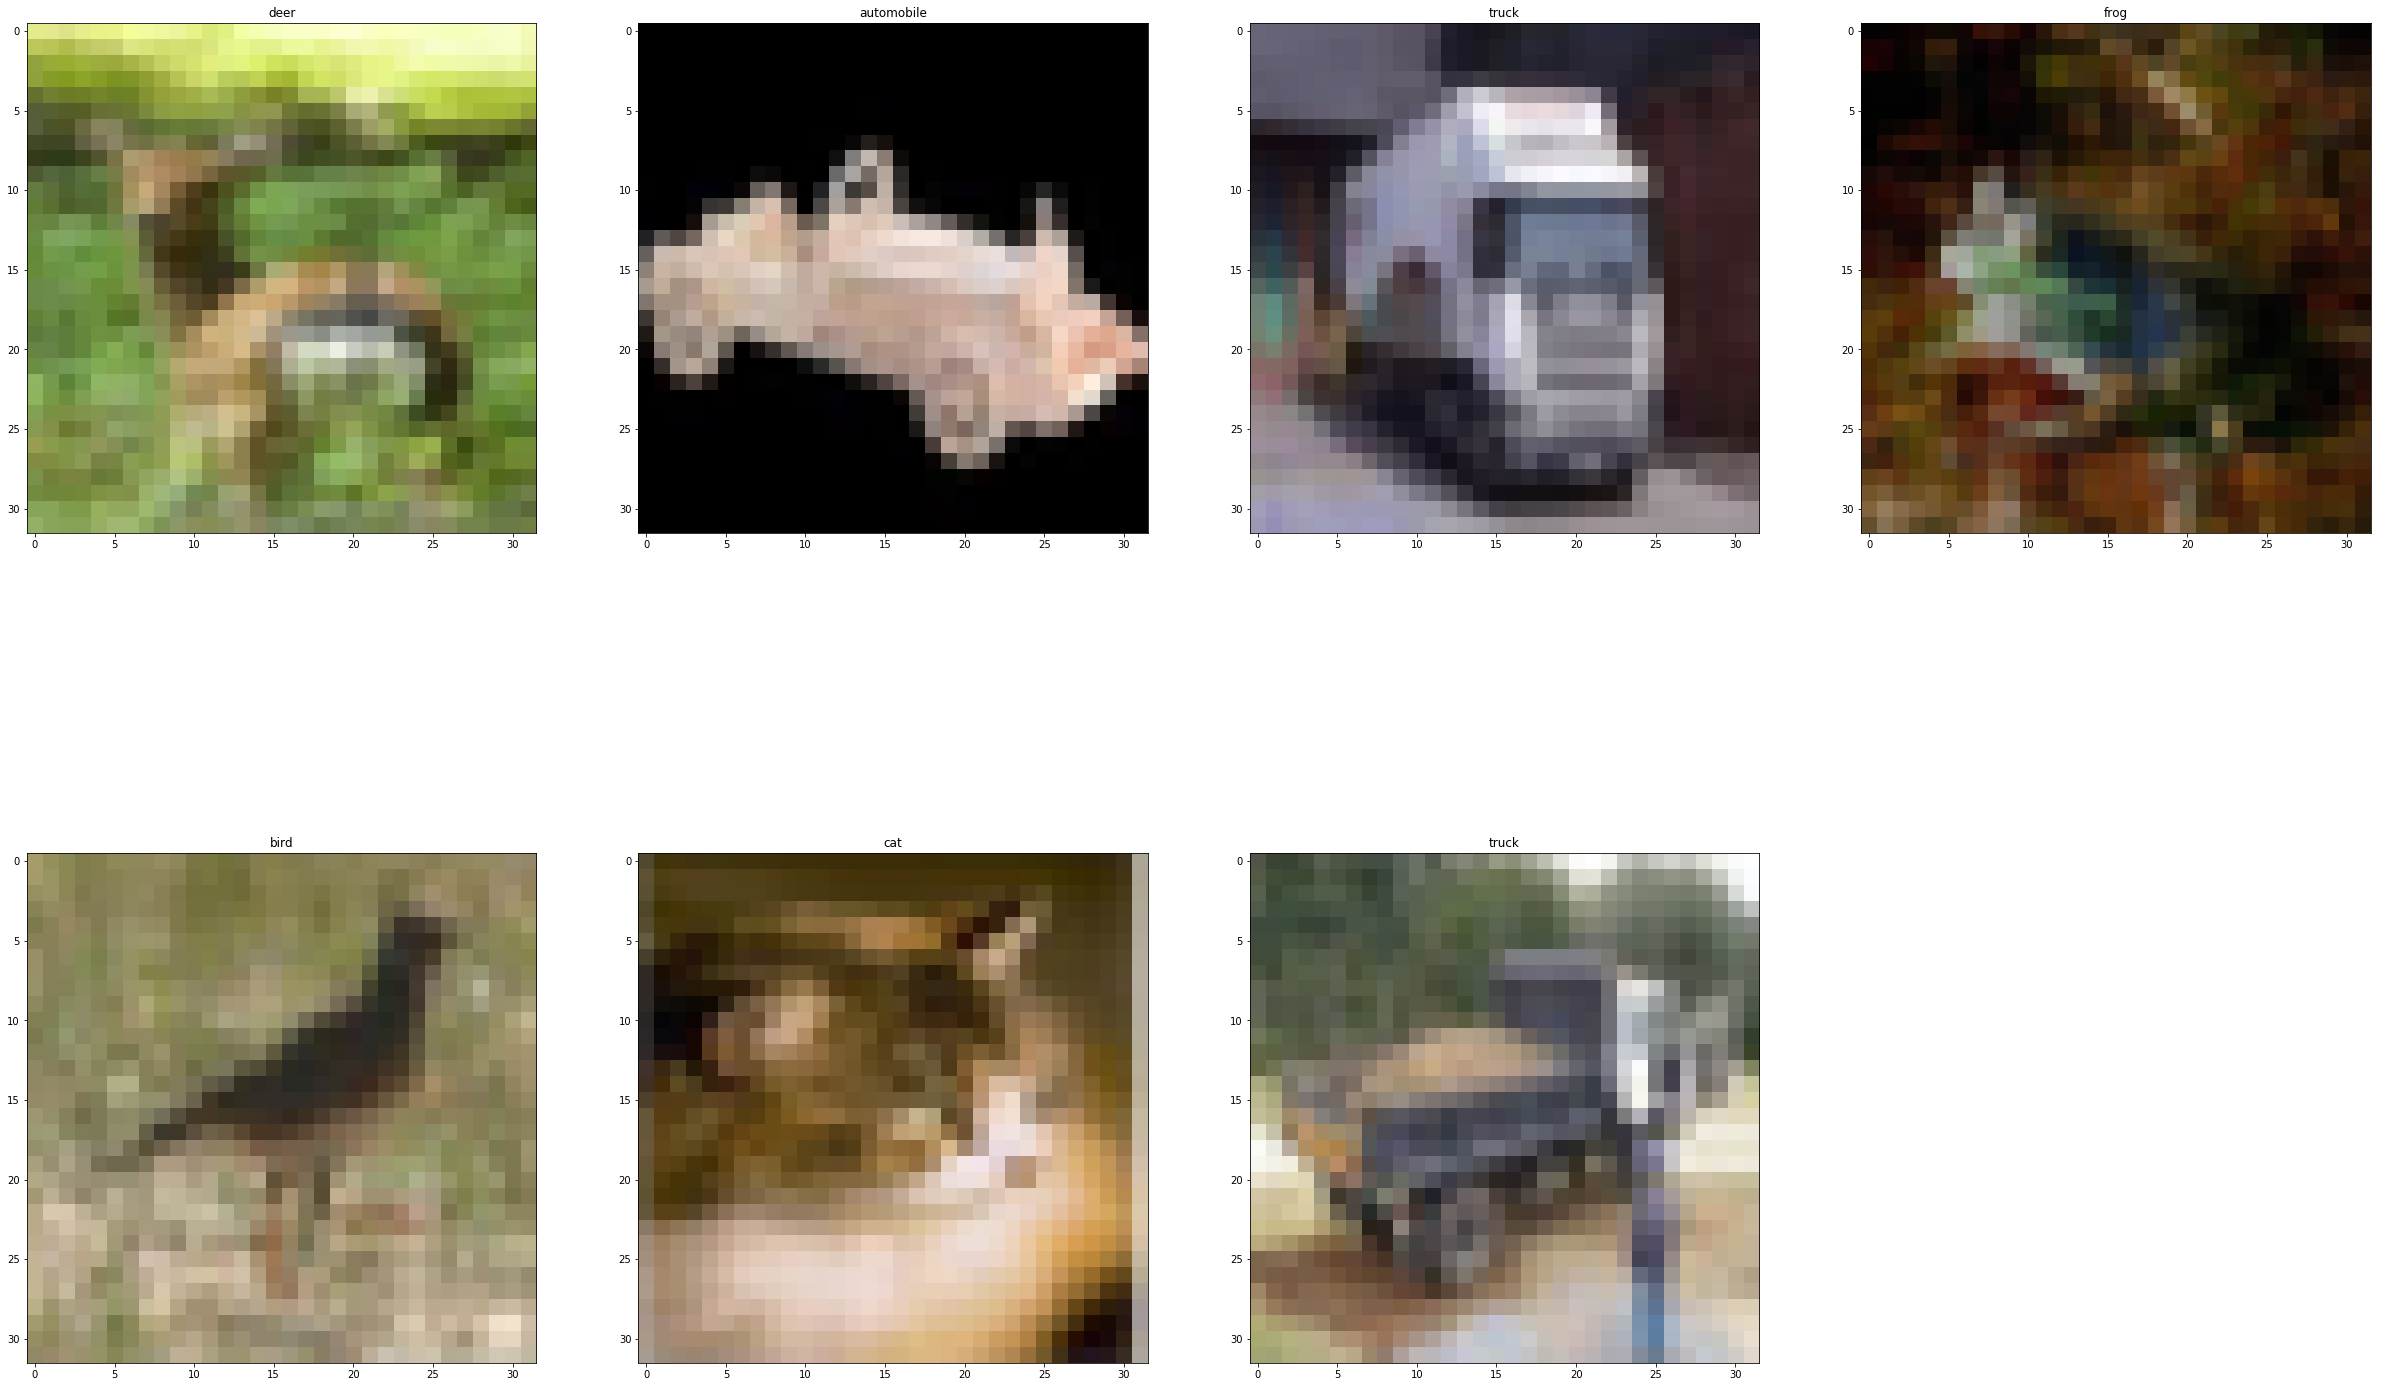

In [8]:
show_images(imgDictionary,2,labelSubset)

In [9]:
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}


In [21]:
param_grid = [
  {'n_estimators': [100,150,200,300,400], 'criterion':['gini','entropy']}]

clf = RandomForestClassifier(n_jobs=-1)


clf = GridSearchCV(clf, param_grid, n_jobs=-1,verbose=1, cv=10)


In [22]:
clf.fit(X_train, Y_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  30 out of  50 | elapsed:  4.0min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.5min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [10, 50, 100, 150, 200]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [23]:
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = Y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


Best parameters set found on development set:

{'n_estimators': 200}

Grid scores on development set:

0.349 (+/-0.016) for {'n_estimators': 10}
0.439 (+/-0.016) for {'n_estimators': 50}
0.461 (+/-0.016) for {'n_estimators': 100}
0.469 (+/-0.016) for {'n_estimators': 150}
0.475 (+/-0.016) for {'n_estimators': 200}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.56      0.57      0.57      1000
          1       0.54      0.56      0.55      1000
          2       0.41      0.34      0.37      1000
          3       0.36      0.28      0.32      1000
          4       0.41      0.40      0.40      1000
          5       0.45      0.42      0.43      1000
          6       0.47      0.60      0.53      1000
          7       0.53      0.48      0.50      1000
          8       0.58      0.62      0.60      1000
          9     

In [24]:
clf.score(X_test, Y_test)

0.4836